In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
# Import files
# obs_A = pd.read_csv('./pipeline/data/obs_A.csv')
# est_A = pd.read_csv('./pipeline/data/est_A.csv')
# obs_B = pd.read_csv('./pipeline/data/obs_B.csv')
# est_B = pd.read_csv('./pipeline/data/est_B.csv')
# obs_C = pd.read_csv('./pipeline/data/obs_C.csv')
# est_C = pd.read_csv('./pipeline/data/est_C.csv')

X_train_observed_A = pd.read_parquet('../../../data/A/X_train_observed.parquet')
X_train_estimated_A = pd.read_parquet('../../../data/A/X_train_estimated.parquet')
X_train_observed_B = pd.read_parquet('../../../data/B/X_train_observed.parquet')
X_train_estimated_B = pd.read_parquet('../../../data/B/X_train_estimated.parquet')
X_train_observed_C = pd.read_parquet('../../../data/C/X_train_observed.parquet')
X_train_estimated_C = pd.read_parquet('../../../data/C/X_train_estimated.parquet')
#train_targets = pd.read_parquet('../data/A/train_targets.csv')



In [4]:
# Combine NaN counts for all dataframes
combined_na_counts = X_train_estimated_A.isna().sum() + X_train_estimated_B.isna().sum() + X_train_estimated_C.isna().sum() + X_train_observed_A.isna().sum() + X_train_observed_B.isna().sum() + X_train_observed_C.isna().sum()

# Print the combined counts
print("Combined NaN counts across all locations:")
print(combined_na_counts)

# Combine zero counts for all dataframes
combined_zero_counts = (X_train_estimated_A == 0).sum() + (X_train_estimated_B == 0).sum() + (X_train_estimated_C == 0).sum() + (X_train_observed_A == 0).sum() + (X_train_observed_B == 0).sum() + (X_train_observed_C == 0).sum()

# Print the combined counts
print("\nCombined zero counts across all locations:")
print(combined_zero_counts)

print(X_train_estimated_A.shape)
print(X_train_estimated_B.shape)
print(X_train_estimated_C.shape)
print(X_train_observed_A.shape)
print(X_train_observed_B.shape)
print(X_train_observed_C.shape)



Combined NaN counts across all locations:
absolute_humidity_2m:gm3               0.0
air_density_2m:kgm3                    0.0
ceiling_height_agl:m               73146.0
clear_sky_energy_1h:J                  0.0
clear_sky_rad:W                        0.0
cloud_base_agl:m                   30912.0
date_calc                              NaN
date_forecast                          0.0
dew_or_rime:idx                        0.0
dew_point_2m:K                         0.0
diffuse_rad:W                          0.0
diffuse_rad_1h:J                       0.0
direct_rad:W                           0.0
direct_rad_1h:J                        0.0
effective_cloud_cover:p                0.0
elevation:m                            0.0
fresh_snow_12h:cm                      0.0
fresh_snow_1h:cm                       0.0
fresh_snow_24h:cm                      0.0
fresh_snow_3h:cm                       0.0
fresh_snow_6h:cm                       0.0
is_day:idx                             0.0
is_in_shadow

In [5]:

def plot_features(csv_path, feature_x, feature_y):
    """
    Plot feature_y against feature_x from a CSV file.
    """
    # Read the CSV file
    df = pd.read_csv(csv_path)

    # Check if the features exist in the dataframe
    if feature_x not in df.columns or feature_y not in df.columns:
        print(f"Error: One or both of the features '{feature_x}' and '{feature_y}' do not exist in the CSV.")
        return

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature_x], df[feature_y], alpha=0.5)
    plt.title(f"{feature_y} vs {feature_x}")
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.grid(True)
    plt.show()


In [22]:
df = X_train_observed_A[['date_forecast', 'is_in_shadow:idx']]
df.head(200)

,date_forecast,is_in_shadow:idx
0,2019-06-02 22:00:00,1.0
1,2019-06-02 22:15:00,1.0
2,2019-06-02 22:30:00,1.0
3,2019-06-02 22:45:00,1.0
4,2019-06-02 23:00:00,1.0
...,...,...
195,2019-06-04 22:45:00,1.0
196,2019-06-04 23:00:00,1.0
197,2019-06-04 23:15:00,1.0
198,2019-06-04 23:30:00,1.0


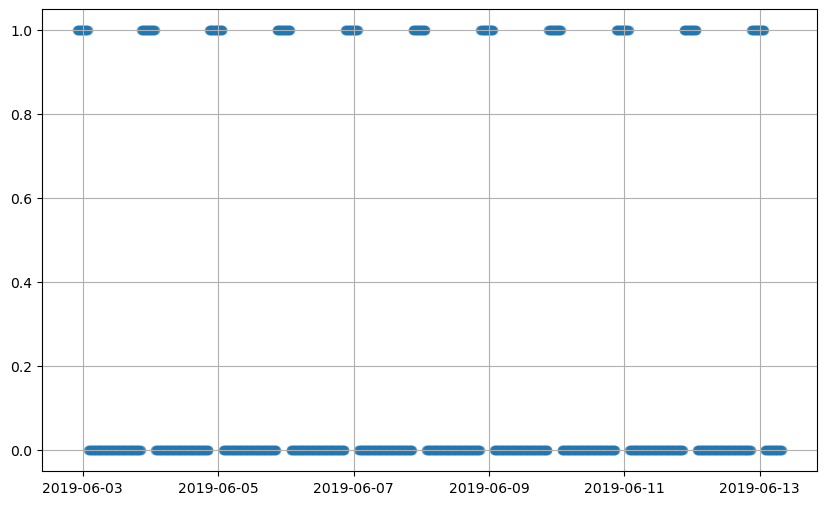

In [29]:
df = X_train_observed_A[['date_forecast', 'is_in_shadow:idx']]
feature_x = X_train_observed_A['is_in_shadow:idx']
feature_y = X_train_observed_A['date_forecast']

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['date_forecast'].iloc[:1000], df['is_in_shadow:idx'].iloc[:1000], alpha=0.5)
plt.grid(True)
plt.show()